<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/LosarbolesdeDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

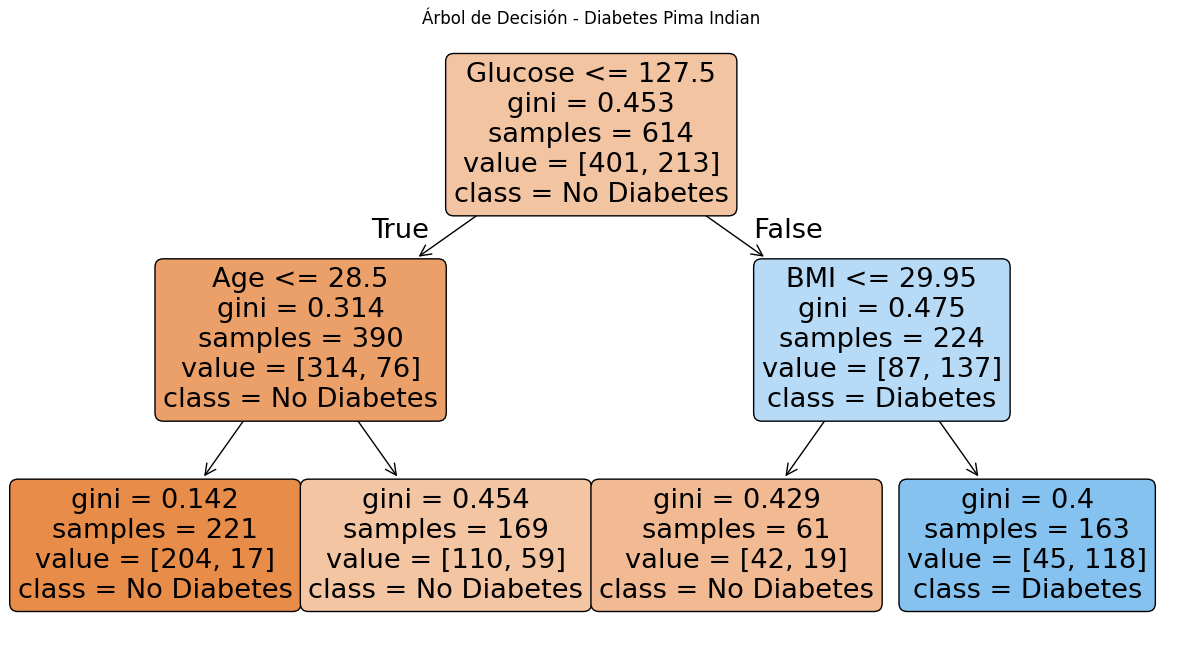

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Cargar la base de datos Pima Indian Diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=column_names)

# Separar características y variable objetivo
X = data.drop(columns='Outcome')
y = data['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
# Limitar la profundidad del árbol a 2 niveles
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(15,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.title("Árbol de Decisión - Diabetes Pima Indian")
plt.show()

Finalm


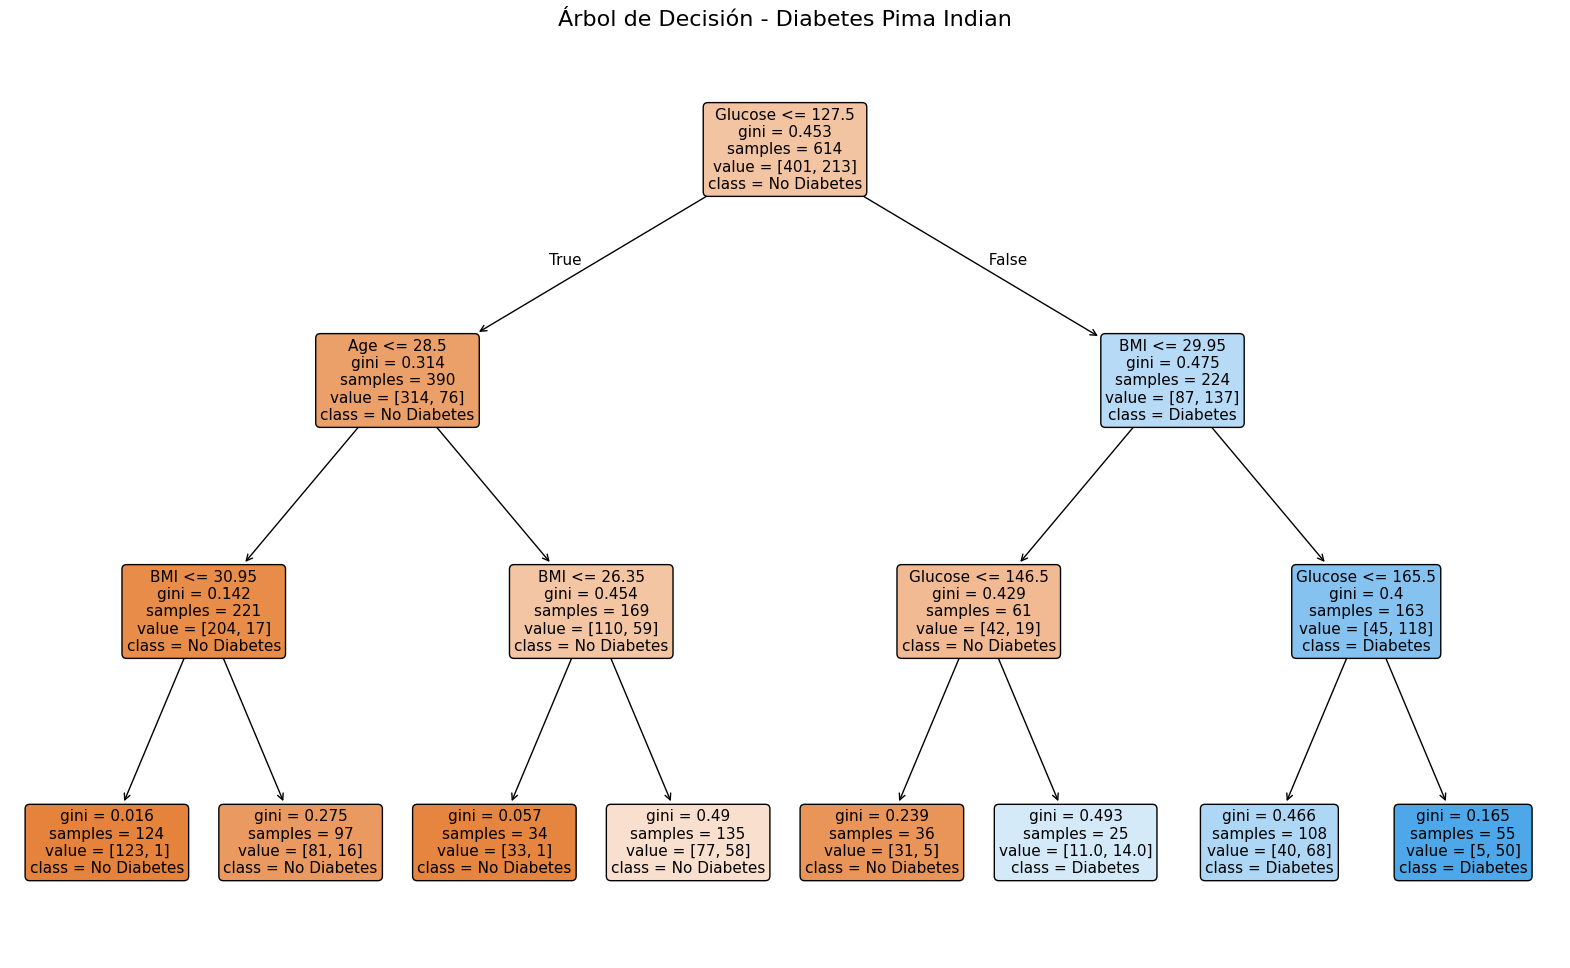

In [ ]:
# Limitar la profundidad del árbol a 2 niveles
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 12))
tree.plot_tree(model,
               feature_names=X.columns,
               class_names=['No Diabetes', 'Diabetes'],
               filled=True,
               rounded=True,
               fontsize=11)  # Ajusta el tamaño de la fuente
plt.title("Árbol de Decisión - Diabetes Pima Indian", fontsize=16)  # Ajusta el tamaño de la fuente del título
plt.show()

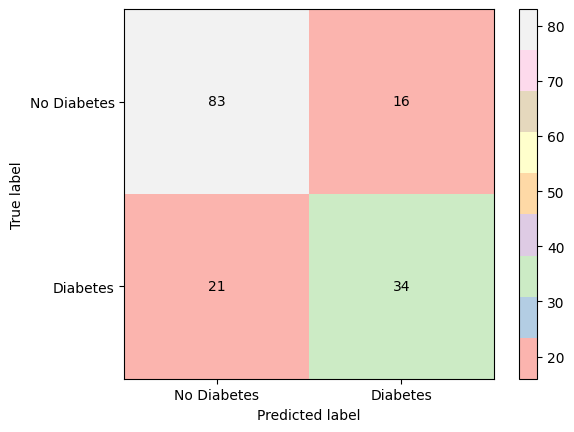

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Pastel1', values_format='.0f')
for text in disp.ax_.texts:
    text.set_color('black')
plt.show()